<a href="https://colab.research.google.com/github/dravidshankar/Data-Science-using-Azure-GD-Goenka/blob/main/DNN_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Image Classification Task using Deep Neural Network


keras : python based package for deep learning . Higher level API
tensorflow : lower level API

In [ ]:
#Import Packages
import numpy as np #array functionality and other features
import pandas as pd #data analysis and manipulation
import matplotlib.pyplot as plt #data visualization
import tensorflow as tf #deep learning
from tensorflow import keras



In [ ]:
#imported dataset
mnistData = keras.datasets.mnist
#mnist - hand written digits 0 to 9
#mnistData = keras.datasets.mnist

In [ ]:
#load the data into input and output variables
# data training : X_train, label:y_train, X_test: test image, y_test: actual labels
(X_train,y_train),(X_test,y_test)=mnistData.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

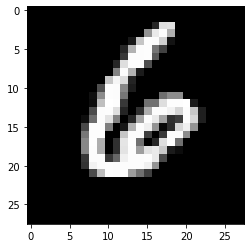

In [ ]:
plt.imshow(X_train[13],cmap='gray')
plt.show()

In [ ]:
y_train[13]

6

In [ ]:
#Data Preprocessing
X_train = X_train.reshape(60000,28*28)
#0-255, scaled down between 0 and 1
X_train = X_train.astype('float32')/255

In [ ]:
X_test = X_test.reshape(10000,28*28)
X_test = X_test.astype('float32')/255

In [ ]:
#Deep neural network achitecture : Sequential API, Functional API
#dnn = keras.models.Sequential()
dnn = keras.models.Sequential()

In [ ]:
#2 hidden layers, hidden layer 1 : 50 units, hidden layer 2 : 30 units
dnn.add(keras.layers.Dense(50,activation='relu',input_shape=X_train.shape[1:]))

In [ ]:
dnn.add(keras.layers.Dense(30,activation='relu'))

In [ ]:
dnn.add(keras.layers.Dense(10,activation='softmax'))

In [ ]:
dnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                39250     
                                                                 
 dense_1 (Dense)             (None, 30)                1530      
                                                                 
 dense_2 (Dense)             (None, 10)                310       
                                                                 
Total params: 41,090
Trainable params: 41,090
Non-trainable params: 0
_________________________________________________________________


In [ ]:
dnn.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
dnn.fit(x=X_train,y=y_train,validation_split=0.1,epochs=10,batch_size=16) #training

Epoch 1/10
3375/3375 [==============================] - 9s 2ms/step - loss: 0.4846 - accuracy: 0.8531 - val_loss: 0.1749 - val_accuracy: 0.9447
Epoch 2/10
3375/3375 [==============================] - 6s 2ms/step - loss: 0.1404 - accuracy: 0.9577 - val_loss: 0.1025 - val_accuracy: 0.9688
Epoch 3/10
3375/3375 [==============================] - 6s 2ms/step - loss: 0.1045 - accuracy: 0.9672 - val_loss: 0.1068 - val_accuracy: 0.9647
Epoch 4/10
3375/3375 [==============================] - 6s 2ms/step - loss: 0.0840 - accuracy: 0.9731 - val_loss: 0.0894 - val_accuracy: 0.9713
Epoch 5/10
3375/3375 [==============================] - 6s 2ms/step - loss: 0.0698 - accuracy: 0.9774 - val_loss: 0.0987 - val_accuracy: 0.9738
Epoch 6/10
3375/3375 [==============================] - 6s 2ms/step - loss: 0.0603 - accuracy: 0.9803 - val_loss: 0.1009 - val_accuracy: 0.9720
Epoch 7/10
3375/3375 [==============================] - 6s 2ms/step - loss: 0.0538 - accuracy: 0.9826 - val_loss: 0.1182 - val_accuracy:

In [ ]:
y_pred = dnn.predict(x=X_test[13].reshape(1,28*28))
y_pred

array([[9.9999499e-01, 1.3493678e-14, 1.8839737e-08, 2.9420464e-09,
        3.7112841e-10, 3.5067600e-08, 2.3428349e-06, 2.6944607e-08,
        9.2769945e-08, 2.4981102e-06]], dtype=float32)

In [ ]:
np.argmax(y_pred)

0

In [ ]:
y_test[13]

0